# Overview of Neural Networks 

#### Objectives: 
- Compare NN to regression 
- Understand the role of each peice in a network 
- Pros and cons of the different activation functions 
- Introduce hyperparameters and backpropagation 
- Look at ways to add complexity and avoid overfitting 

## Remember when we went from linear to logistic regression?
![](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1523361626/linear_vs_logistic_regression_h8voek.jpg)

### Used a linear combination of variables

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2, x_2 +\ldots + \hat\beta_n x_n $$

### And passed the sum product of those variables and coefficients through a sigmoid function.

$$ P(y) = \displaystyle \frac{1}{1+e^{-(\hat y)}}$$

![](https://mathworld.wolfram.com/images/eps-gif/SigmoidFunction_701.gif)

### Another way of writing this:
![log-reg-der](log_reg_deriv.png)

### If we change the orientation of the first part, we get a new diagram:
![](https://miro.medium.com/max/1280/1*8VSBCaqL2XeSCZQe_BAyVA.jpeg)

### A more general notation for a single layer NN:
![fnn](First_network.jpg)

## Logic Scenario 
A perceptron basically allows us to separate data. 

In [1]:
# Some initial setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)

In [2]:
def test_logic(inputs, correct_outputs, weights, bias):
    our_outputs = []
    w1,w2 = weights
    # Check each output
    for test_input, correct_output in zip(inputs, correct_outputs):
        linear_combination = w1 * test_input[0] + w1 * test_input[1] + bias
        output = int(linear_combination >= 0)
        is_correct_string = 'Yes' if output == correct_output else 'No'
        our_outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

    # Print results
    num_wrong = len([output[4] for output in our_outputs if output[4] == 'No'])
    output_frame = pd.DataFrame(
                        our_outputs, 
                        columns=[
                            'Input 1', 
                            '  Input 2', 
                            '  Linear Combination', 
                            '  Activation Output', 
                            '  Is Correct']
    )

    print(output_frame.to_string(index=False))

### Logical `AND`

$A \land B = C$

Truth table:

| A | B | C |
|---|---|---|
| 1 | 1 | 1 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 0 |

<pre>
(x1) ⇒ (w1) ⇒
        
(x2) ⇒ (w2) ⇒    ⇒  (linear combination)  ⇒ (>= 0 ?) ⇒ (Output)

(b)  ⇒ (1)  ⇒  
</pre>

In [3]:
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]

In [25]:
# Set your values
w1 = 0.5
w2 = 0.5
bias = -1.0

weights = (w1,w2)

In [26]:
# Test it out!
test_logic(test_inputs, correct_outputs, weights, bias)

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.0                    0          Yes
      0          1                  -0.5                    0          Yes
      1          0                  -0.5                    0          Yes
      1          1                   0.0                    1          Yes


## Parts of a Neural Network

### Layers 

- **Input Layer**: the initial parameters (these will be the parts we feed to our network)
- **Output Layer**: the classification (or regression predictions)
- **Hidden Layer(s)**: the other neurons potentially in a neural network to find more complex patterns

### Weights

>The weights from our inputs are describing how much they should contribute to the next neuron. A larger weight means this neuron matters more. Negative weights mean the neuron has the opposite effect(friend who hates movies you like).

But we can also think of the weights of hidden layer neurons telling us how much of these linear separations should be combined.


### Activation Functions 

In [27]:
def arctan(x, derivative=False):
    if (derivative == True):
        return 1/(1+np.square(x))
    return np.arctan(x)

z = np.arange(-10,10,0.2)

#### Sigmoid 
Range: $(0,1)$

Function: $\sigma(x) = \frac{1}{1+e^{-x}}$

**Advantages**:
- Relatively intuitive at classifications
- Commonly used

**Disadvantages**:
- Not as efficient at training(doesn't work with backprop)
- vanishing gradient problem

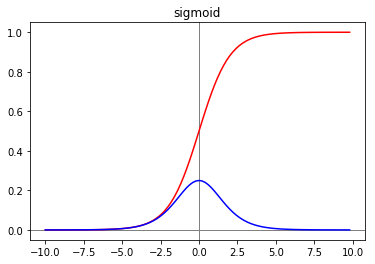

In [28]:
#linear combinations on x-axis, blue line gradient
def sigmoid(x, derivative=False):
    f = 1 / (1 + np.exp(-x))
    if (derivative == True):
        return f * (1 - f)
    return f

y = sigmoid(z)
dy = sigmoid(z, derivative=True)
plt.title("sigmoid")
plt.axhline(color="gray", linewidth=1,)
plt.axvline(color="gray", linewidth=1,)
plt.plot(z, y, 'r')
plt.plot(z, dy, 'b')

#### ## Hyperbolic Tangent - Tanh
Range: $(-1,1)$

Function: $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

**Advantages**:
- More efficient at training than sigmoid
- Steeper gradient

**Disadvantages**:
- Still suffers from the vanishing gradient problem

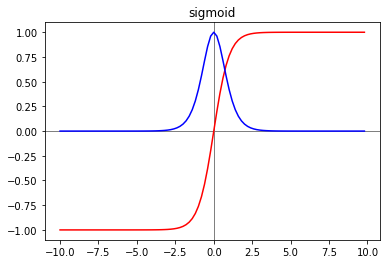

In [29]:
def tanh(x, derivative=False):
    f = np.tanh(x)
    if (derivative == True):
        return (1 - (f ** 2))
    return np.tanh(x)

y = tanh(z)
dy = tanh(z, derivative=True)
plt.title("sigmoid")
plt.axhline(color="gray", linewidth=1,)
plt.axvline(color="gray", linewidth=1,)
plt.plot(z, y, 'r')
plt.plot(z, dy, 'b')

#### ReLu 
Range: $(0,\infty)$

Function: $f(x) = 
    \begin{cases}
      0, & \text{if}\ x<0 \\
      x, & \text{if}\ x\ge 0
    \end{cases}$
    
**Advantages**:
- Calculation is relatively efficient
- Specify a more positive activation

**Disadvantages**:
- Zero value: longer to train. Can't tell the difference between a little negative and very negative. 

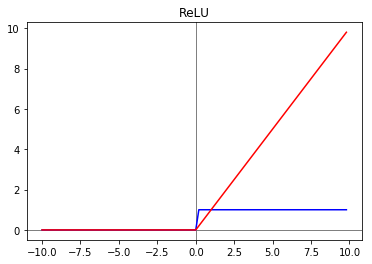

In [30]:
def relu(x, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = 0
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = 0
    return f

plt.title("ReLU")
y = relu(z)
dy = relu(z, derivative=True)
plt.axhline(color="gray", linewidth=1,)
plt.axvline(color="gray", linewidth=1,)
plt.plot(z, dy, 'b')
plt.plot(z, y, 'r')


#### Leaky ReLu
Range: $(-\infty,\infty)$

Function: $f(x) = 
    \begin{cases}
      - c \cdot x, & \text{if}\ x<0 \\
      x, & \text{if}\ x\ge 0
    \end{cases}\  \text{where}\ c\ \text{is some small value (0.01)}$
    
**Advantages**:
- Helps with training speed

**Disadvantages**:
- Still has to compute the slope when x is negative 

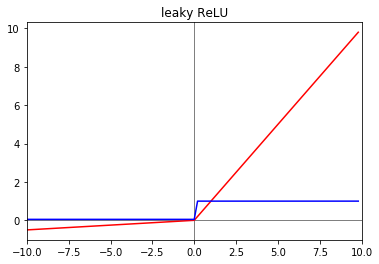

In [31]:
def leaky_relu(x, leakage = 0.05, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = leakage
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = x[i]* leakage
    return f

# the default leakage here is 0.05!
y = leaky_relu(z)
dy = leaky_relu(z, derivative=True)
plt.axhline(color="gray", linewidth=1,)
plt.axvline(color="gray", linewidth=1,)
plt.title("leaky ReLU")
plt.xlim(-10,10)
plt.plot(z, y, 'r')
plt.plot(z, dy, 'b')

### Other Hyperparameters 

- **Learning Rate ($\alpha$)**: how big of a step we take in gradient descent
- **Number of epochs**: how many times we repeat this process
- **batch-size**: how many data points we use in a single training session (1 epoch)

Remember, any parameter adjusted to enhance the neural network's learning _is_ a hyperparameter (this includes the actual structure of the neural net)

### Backpropagation 
The **backpropagation** algorithm takes the idea of optimally adjusting the parameters (weights) to get a better result. 

We do this tuning by propogating the (average) error back through the network, with the cost function $J$ guiding us and adjusting via gradient descent.

> Turn down previous neurons that give a bad result
>
> Turn up previous neurons that give a good result

> Great video explanation of backpropogation by 3Blue1Brown (part of a full playlist): [Backpropagation calculus | Deep learning, chapter 4](https://www.youtube.com/watch?v=tIeHLnjs5U8&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=4)

## Adding Complexity

In [ ]:
x = np.random.rand(40)
y = np.random.rand(40)
z = (x + y) < np.random.rand(40)*2

plt.scatter(x,y,c=z)

### Add More Layers but remember

> More complexity can increase our chances of overfitting
>
> More parameters mean more computation (takes longer to train)

## Avoiding Overfitting 

### Use Train-validation-test sets

- Think of training as what you study for a test
- Think of validation is using a practice test (note sometimes called dev)
- Think of testing as what you use to judge the model

### Look at Model Complexity Graph 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

validation_error = np.array([5,3.5,2,3,4])
train_error = np.array([4.5,3,1.5,1,0.5])
n_epochs = np.array([5,50,100,200,300])

plt.scatter(n_epochs, train_error,)
plt.scatter(n_epochs, validation_error)
plt.legend(['train error','validation error'])
plt.xlabel('Number of Epochs')
plt.ylabel('Error')
plt.show()

### Early Stopping 
Not the best solution but there are 2 options that are better. 

We train our model but only keep the best model it comes across. We can do this with a [ModelCheckpoint callback](https://keras.io/callbacks/#modelcheckpoint)

In [ ]:
from keras import callbacks

checkpoint = callbacks.ModelCheckpoint("best_model.h5",
                                             save_best_only=True
)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint]
)

# Now points to the best model found during the fit
model = keras.models.load_model("best_model.h5")

We can also stop our training early when our test error isn't really changing. We can do this with a [EarlyStopping callback](https://keras.io/callbacks/#earlystopping)

In [ ]:
from keras import callbacks

checkpoint = callbacks.EarlyStopping(monitor='val_loss', # What to watch
                                     min_delta=0.01, # How much change to get
                                     patience=5 # No change after 5 epochs
)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint]
)

### Too much Confidence in your model 

When a model has large weights, the model is "too confident"

We need to punish large (confident) weights by contributing them to the error function

### L1 Regularization - Absolute Value

- Tend to get sparse vectors (small weights go to 0)
- Reduce number of weights
- Good feature selection to pick out importance

$$ J(W,b) = -\dfrac{1}{m} \sum^m_{i=1}\big[\mathcal{L}(\hat y_i, y_i)+ \dfrac{\lambda}{m}|w_i| \big]$$

### L2 Regularization - Squared Value

- Not sparse vectors (weights homogeneous & small)
- Tends to give better results for training

    
$$ J(W,b) = -\dfrac{1}{m} \sum^m_{i=1}\big[\mathcal{L}(\hat y_i, y_i)+ \dfrac{\lambda}{m}w_i^2 \big]$$

## Dropout 

### Avoiding the Self-Perpetuating Strength Training

When working out, we'd train our left and right arms evenly and switch our exercise routine throughout the week.

In neural networks, we switch around which nodes we use during our training.

Assign a probability of using a given node for that epoch (usually about 20% chance). When we have many epochs, we likely will even out the randomness

### Example Code 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

n_classes = 10

model = Sequential()

# Input Layer
model.add(Dense(128, input_dim=100, activation='relu', name='input_layer'))
model.add(Dropout(0.2, name='input_dropout'))
# Hidden Layer
model.add(Dense(256, activation='relu', name='hidden_layer1'))
model.add(Dropout(0.2, name='hidden_layer1_dropout'))
# Output Layer
model.add(Dense(n_classes, activation='softmax', name='output'))


model.summary()

## Practice and Play 
- [playground.tensorflow.org](https://playground.tensorflow.org): A visual playground for us to train a neural network